In [97]:
from sklearn.decomposition import PCA
import numpy as np 

import matplotlib.pyplot as plt

from scipy.stats import linregress, f_oneway

import pandas as pd

from scipy.spatial import procrustes

from sklearn.preprocessing import StandardScaler



In [42]:
wk_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLDMNI/data/group' #2min52 sec to load

dentate_lang = np.load(wk_dir + '/Lang_dentate.npy')  #shape (16,16,10,voxels) (subj x repetition x condition x voxels)
cereb_gray_lang = np.load(wk_dir + '/Lang_cereb_gray.npy')

dentate_mdtb = np.load(wk_dir + '/MDTB_dentate.npy')  
cereb_gray_mdtb = np.load(wk_dir + '/MDTB_cereb_gray.npy')

dentate_mdtb_ses2 = np.load(wk_dir + '/MDTB_ses2_dentate.npy')  
cereb_gray_mdtb_ses2 = np.load(wk_dir + '/MDTB_ses2_cereb_gray.npy')

dentate_pontine7T = np.load(wk_dir + '/data_dentate.npy')
cereb_gray_pontine7T = np.load(wk_dir + '/data_cereb_gray.npy')


In [68]:
wk_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/Pontine7T/RegionOfInterest_BOLDMNI/data/group' #2min52 sec to load

dentate_lang_pca = np.load(wk_dir + '/Lang_dentate_pca.npy')  #shape (16,16,10,voxels) (subj x repetition x condition x voxels)
cereb_gray_lang_pca = np.load(wk_dir + '/Lang_cereb_gray_pca.npy')

dentate_mdtb_pca = np.load(wk_dir + '/MDTB_dentate_pca.npy')  
cereb_gray_mdtb_pca = np.load(wk_dir + '/MDTB_cereb_gray_pca.npy')

dentate_mdtb_ses2_pca = np.load(wk_dir + '/MDTB_ses2_dentate_pca.npy')  
cereb_gray_mdtb_ses2_pca = np.load(wk_dir + '/MDTB_ses2_cereb_gray_pca.npy')

dentate_pontine7T_pca = np.load(wk_dir + '/data_dentate_pca.npy')
cereb_gray_pontine7T_pca = np.load(wk_dir + '/data_cereb_gray_pca.npy')


In [100]:
dentate_flat = dentate_pontine7T.reshape(dentate_pontine7T.shape[2], -1)  # shape (conditions, subjects * runs * voxels)

# Similarly for cerebellar gray matter
cereb_gray = np.nan_to_num(cereb_gray_pontine7T)  # Replace NaNs with zeros
cereb_gray_flat = cereb_gray.reshape(cereb_gray.shape[2], -1)  # shape (conditions, subjects * runs * voxels)

scaler = StandardScaler()

# Perform PCA to reduce dimensionality, keep a certain number of components (e.g., top 90% variance)
pca_dentate = PCA(n_components=0.9)
dentate_pca = pca_dentate.fit_transform(dentate_flat)  # This will give you the principal components of dentate

dentate_pca_normalized = scaler.fit_transform(dentate_pca)

pca_cerebgray = PCA(n_components=0.9)
cereb_gray_pca = pca_cerebgray.fit_transform(cereb_gray_flat)  # This will give you the principal components of cerebellar gray matter
cereb_gray_pca_normalized = scaler.fit_transform(cereb_gray_pca)


explained_variance_dentate = pca_dentate.explained_variance_ratio_
explained_variance_cereb_gray = pca_cerebgray.explained_variance_ratio_

# Print explained variance for each component
print("Explained Variance for Dentate Components:")
print(explained_variance_dentate)

print("Explained Variance for Cerebellar Gray Components:")
print(explained_variance_cereb_gray)

mtx1, mtx2, disparity = procrustes(dentate_pca, cereb_gray_pca)

Explained Variance for Dentate Components:
[0.12747109 0.11642171 0.11190779 0.11159448 0.10804735 0.10782912
 0.10709548 0.10604604 0.10358694]
Explained Variance for Cerebellar Gray Components:
[0.13707185 0.13193905 0.11959534 0.11248397 0.10561908 0.10134991
 0.10042858 0.09657964]


ValueError: Input matrices must be of same shape

In [124]:
print(disparity)

print(dentate_pca_normalized[5])
print(cereb_gray_pca_normalized[5])

print(np.mean(dentate_pca_normalized[8]))
print(np.mean(cereb_gray_pca_normalized[8]))



#print(mtx1[1])
#print(mtx2[1])  

0.29226688175178206
[ 0.23465509  0.29341981  0.46907472  0.47515339  0.96531778  0.24463966
 -1.65190044 -2.07924893 -0.60770208]
[-0.12218293  0.29898932 -0.37081509 -0.42052541  0.72923665 -0.50074124
 -2.6417801   0.87875247]
0.20554099697199885
-0.1542181921941675


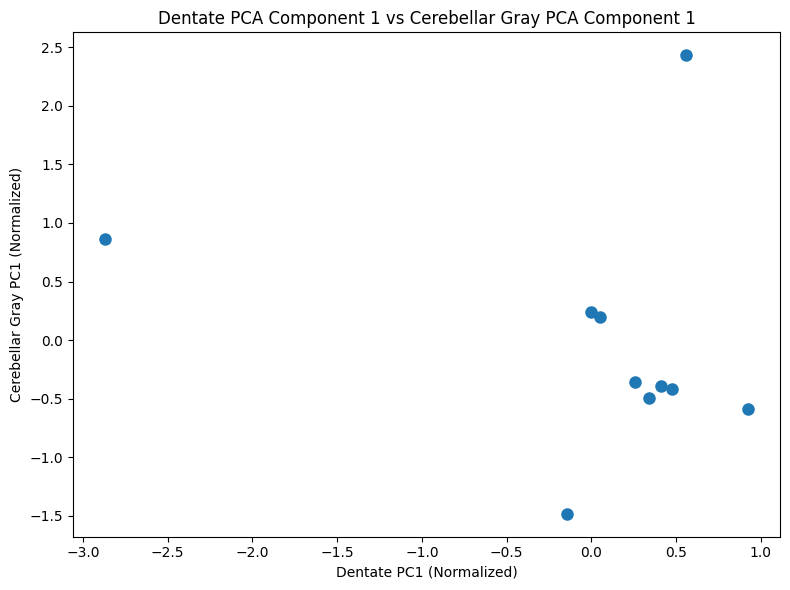

In [123]:
import matplotlib.pyplot as plt

# Select specific components to plot (for example, PC1 of Dentate vs PC1 of Cerebellar Gray)
# You can change the indices as needed
dentate_pc1 = dentate_pca_normalized[:, 3]  # PC1 of Dentate
cereb_gray_pc1 = cereb_gray_pca_normalized[:, 3]  # PC1 of Cerebellar Gray

# Plot
plt.figure(figsize=(8, 6))
plt.plot(dentate_pc1, cereb_gray_pc1, 'o', markersize=8)  # Plot the points (Dentate PC1 vs Cerebellar Gray PC1)

plt.title('Dentate PCA Component 1 vs Cerebellar Gray PCA Component 1')
plt.xlabel('Dentate PC1 (Normalized)')
plt.ylabel('Cerebellar Gray PC1 (Normalized)')
plt.tight_layout()
plt.show()


/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_85881/2916520236.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(condition_names_pontine))


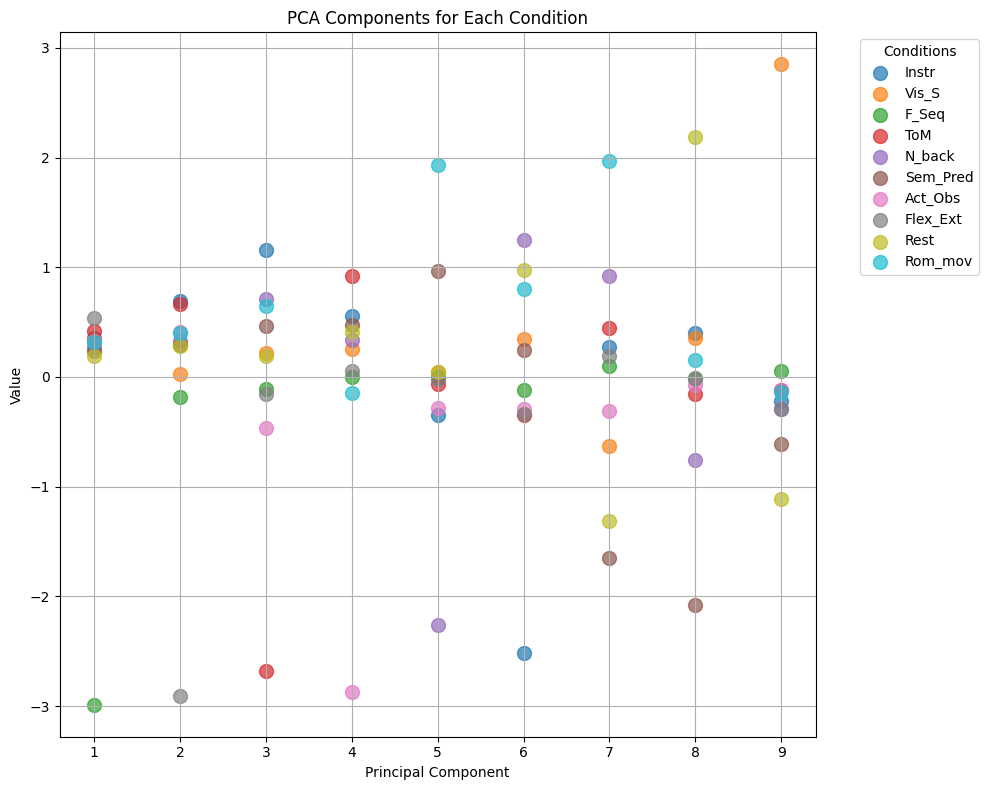

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming dentate_pca_normalized shape is (10, 9), where 10 is the number of conditions, and 9 is the number of components
# condition_names_pontine are the labels for the conditions
condition_names_pontine = ["Instr", "Vis_S", "F_Seq", "ToM", "N_back", "Sem_Pred", "Act_Obs", "Flex_Ext", "Rest", "Rom_mov"]

# Colors for each condition (adjust the number of colors if needed)
colors = plt.cm.get_cmap('tab10', len(condition_names_pontine))

# Plotting all PCA components for each condition
plt.figure(figsize=(10, 8))

for i, condition in enumerate(condition_names_pontine):
    # Plot all components for the i-th condition
    plt.scatter(np.arange(1, dentate_pca_normalized.shape[1] + 1), dentate_pca_normalized[i, :], 
                label=condition, color=colors(i), s=100, alpha=0.7)

# Customize the plot
plt.title("PCA Components for Each Condition")
plt.xlabel("Principal Component")
plt.ylabel("Value")
plt.xticks(np.arange(1, dentate_pca_normalized.shape[1] + 1))  # Set x-ticks to show component numbers
plt.legend(title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside the plot
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_85881/1344234383.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(condition_names_pontine))


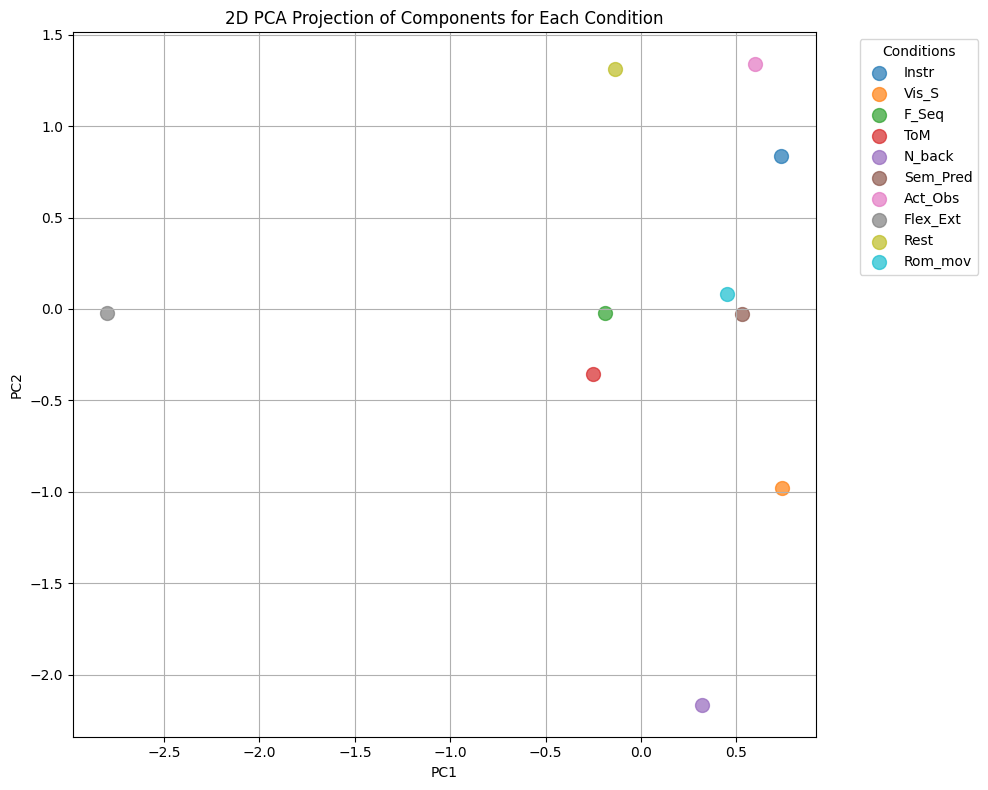

In [127]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming dentate_pca_normalized is a (10, 9) shape matrix where 10 is the number of conditions and 9 is the number of PCA components
# condition_names_pontine are the labels for the conditions
condition_names_pontine = ["Instr", "Vis_S", "F_Seq", "ToM", "N_back", "Sem_Pred", "Act_Obs", "Flex_Ext", "Rest", "Rom_mov"]

# Perform PCA and reduce the components to 2D for visualization (if necessary)
# Assuming dentate_pca_normalized is already a (10, 9) matrix of normalized components
# Reduce to 2D using the first two principal components
pca = PCA(n_components=2)
dentate_2d = pca.fit_transform(dentate_pca_normalized)

# Colors for each condition (use distinct colors)
colors = plt.cm.get_cmap('tab10', len(condition_names_pontine))

# Plotting the 2D projection of PCA components, color-coded by condition
plt.figure(figsize=(10, 8))

for i, condition in enumerate(condition_names_pontine):
    # Plot the 2D projection of the PCA components for the i-th condition
    plt.scatter(dentate_2d[i, 0], dentate_2d[i, 1], label=condition, color=colors(i), s=100, alpha=0.7)

# Customize the plot
plt.title("2D PCA Projection of Components for Each Condition")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside the plot
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [73]:
#group-level regression (creating .tsv files)

y = np.mean(dentate_pca_normalized, axis=1) #shape (10,) #avg activity per condition across subjects, runs, and voxels 

x = np.mean(cereb_gray_lang_pca, axis=1)  

#condition_names_pontine = ["Instr", "Vis_S", "F_Seq", "ToM", "N_back", "Sem_Pred", "Act_Obs", "Flex_Ext", "Rest", "Rom_mov"]
condition_labels_language = ["Rest", "Word_reading", "Verb_generation", "Act_Obs_Act", "Act_Obs", "Intact_passage", "Degraded_passage", 
                        "Tongue_movement", "Finger_Seq", "ToM", "Aud_Narr", "N_back", "Oddball", "Demand_Grid", "Rom_mov", "Spatial_Nav",
                        "Sentence_Reading", "Non-word_reading"]

#condition_labels_mdtb_ses1 = ["NoGo","Go", "ToM", "VideoAct","VideoKnots", "Unpleas_Scenes", "Pleas_scenes", "Math", "Digit_Judg"
        #            ,"CheckerBoard", "Sad_Faces", "Happy_Faces", "Interval_Timing", "Motor_Imagery", "Finger_Simple", "Finger_Seq"
          #          ,"Verbal0Back", "Verbal2Back","Object0Back", "Object2Back", "Spatial_Nav", "StroopIncon", "StroopCon", "Verb_generation",
     #               "Word_reading", "Vis_S_Small", "Vis_S_Med", "Vis_S_Large", "Rest"]

#condition_labels_mdtb_ses2 = ["CPRO", "Prediction", "PredictViol", "PredictScram", "VerbGen", "WordRead", "SpatialNav", "SpatialMap_Easy",
 #                             "SpatialMap_Med", "SpatialMap_Diff", "NatureMovie", "RomanceMovie", "LandscapeMovie", "FingerSimple", "FingerSeq",
  #                            "MentalRotation_Easy", "MentalRotation_Med", "MentalRotation_Diff", "Object0Back", "Object2Back", 
   #                           "BodyMotionIntact", "BodyMotionScram", "RespAltEasy", "RespAltMed", "RespAltDiff", "VisualSearchSmall", "VisualSearchMed",
    #                          "VisualSearchLarge","ToM", "VideoAct", "VideoKnots", "Rest"]

results = []

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = f"{slope:.4f} * x + {intercept:.4f}"  # Store as a string
F_value = (r_value**2 / (1 - r_value**2)) * ((len(condition_labels_language) - 2) / 1)

for i in range(len(condition_labels_language)):
    results.append(["group", "dentate vs cereb_gray", condition_labels_language[i], x[i], y[i], regression_line, r_value**2, F_value, p_value, "Language_PCA_norm"])

# Convert to a DataFrame
df = pd.DataFrame(results, columns=["Subjects", "ROIs", "cond", "x", "y", "regression line", "R2", "F-value", "p-value", "dataset"])

# Save to TSV
df.to_csv("group_ROI_correlations.tsv", sep="\t", mode = 'a', index=False)


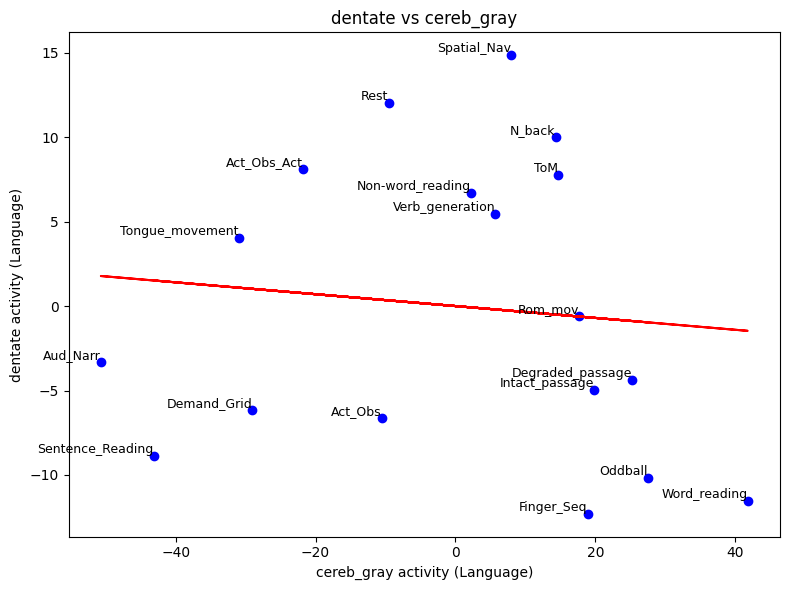

In [74]:
# group plots

df = pd.read_csv('group_ROI_correlations.tsv', sep="\t")

df = df[df["dataset"] == "Language_PCA"]

# List of ROI pairs to loop over
roi_pairs = [
    #"cereb_gray vs dentate",
    "dentate vs cereb_gray",
    #"cereb_gray vs pontine",
    #"cereb_gray vs olive",
    #"dentate vs pontine",
    #"thalamus vs dentate",
    #"redn vs dentate",
    #"olive vs redn",
    #"dentate vs olive",
]

# Loop over each ROI pair
for roi in roi_pairs:
    roi_data = df[df['ROIs'] == roi]

    # Extract the data for plotting
    x = roi_data['x']
    y = roi_data['y']
    condition_labels = roi_data['cond']

    # Regression line parsing
    regression_line = roi_data['regression line'].iloc[0]
    slope, intercept = map(float, regression_line.split(" * x + "))

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color="blue")

    # Plot regression line
    plt.plot(x, slope * x + intercept, color="red")

    # Add labels and title
    plt.xlabel(f"{roi.split(' vs ')[1]} activity (Language)")
    plt.ylabel(f"{roi.split(' vs ')[0]} activity (Language)")
    plt.title(f"{roi}")

    # Extract statistical values
    r_squared = float(roi_data['R2'].iloc[0])
    p_value = float(roi_data['p-value'].iloc[0])

    # Display R² and p-value on the plot
    #plt.text(0.05, 0.95, f"R² = {r_squared:.4f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='black')
    #plt.text(0.05, 0.90, f"p = {p_value:.4f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='black')

    # Add condition labels to points
    for i, label in enumerate(condition_labels):
        plt.text(x.iloc[i], y.iloc[i], label, fontsize=9, color='black', ha='right', va='bottom')

    # Show the plot
    plt.tight_layout()
    plt.show()
